### Credit Card Approval Prediction Model

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,f1_score
from imblearn.over_sampling import RandomOverSampler



In [99]:
df = pd.read_excel("data.xlsx")


In [100]:
df.shape

(30, 5)

In [101]:
df.head()

,Location,cust_age,Avg_order_value,Credit score,credit_defaulter
0,City,17.0,200.0,450,yes
1,Rural,20.0,300.0,700,no
2,Rural,30.0,654.0,750,no
3,City,26.0,453.0,564,no
4,City,60.0,33.0,600,no


#### Summary of the Data

In [102]:
df.describe()

,cust_age,Avg_order_value,Credit score
count,29.000000,29.000000,30.000000
mean,43.068966,593.965517,667.433333
std,42.059423,501.194536,108.148583
min,17.000000,23.000000,370.000000
25%,24.000000,234.000000,602.750000
50%,32.000000,456.000000,675.500000
75%,45.000000,767.000000,753.000000
max,245.000000,2000.000000,843.000000


In [103]:
df.dtypes

Location             object
cust_age            float64
Avg_order_value     float64
Credit score          int64
credit_defaulter     object
dtype: object

So we have a data which has 30 rows and 5 columns, in which 4 columns are the predictors and the "credit_defaulter" is the target variable.

### Data Cleaning

In [104]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ","_")

In [105]:
df.isna().sum()

location            0
cust_age            1
avg_order_value     1
credit_score        0
credit_defaulter    0
dtype: int64

We have one missing value in 2 columns in the dataset. Since there are very less missing values we can either remove those columns but also we can impute those with a mean or median.


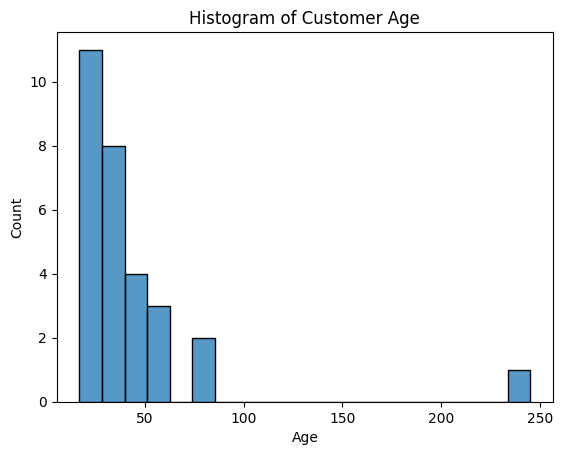

In [107]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Customer Age')
sns.histplot(df['cust_age'], bins=20)  
plt.show()

Since the human age can be within 1-120, having a value above 200 is an error that should be corrected. Since the age is skewed replacing with the median value would be the better option as it is not impacted by the extreme values.

In [76]:
df['cust_age'].loc[df['cust_age']>200] = df['cust_age'].median()

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2872431573.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['cust_age'].loc[df['cust_age']>200] = df['cust_age'].median()
C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2872431573.py:1

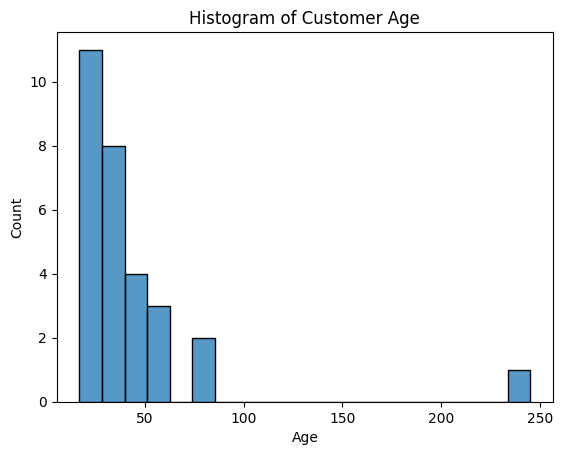

In [108]:
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Customer Age')
sns.histplot(df['cust_age'], bins=20)
plt.show()

Also we can replace the missing value with the median value as the column is skewed to the right.

In [78]:
df['cust_age'].fillna(df['cust_age'].median(), inplace=True)

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\989026022.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cust_age'].fillna(df['cust_age'].median(), inplace=True)


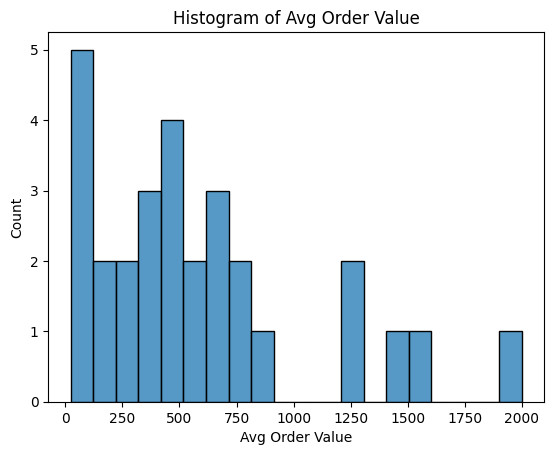

In [79]:
plt.xlabel('Avg Order Value')
plt.ylabel('Count')
plt.title('Histogram of Avg Order Value')
sns.histplot(df['avg_order_value'], bins=20)  # Adjust the number of bins as needed
plt.show()

In [80]:
df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)

C:\Users\santh\AppData\Local\Temp\ipykernel_3744\2218021865.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)


In [81]:
df.isna().sum()

location            0
cust_age            0
avg_order_value     0
credit_score        0
credit_defaulter    0
dtype: int64

In [82]:
print("Maximum value of the credit score is",df['credit_score'].max()," and the minimum value is ",df['credit_score'].min())

Maximum value of the credit score is 843  and the minimum value is  370


### EDA

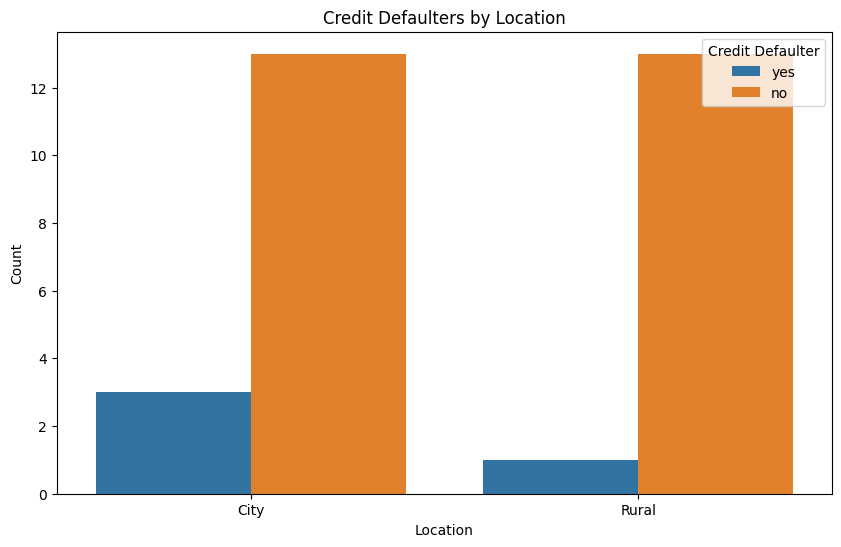

In [83]:
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Credit Defaulters by Location')
location_credit_defaulter_counts = df.groupby('location')['credit_defaulter'].sum()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='location', hue='credit_defaulter')
plt.legend(title='Credit Defaulter', loc='upper right')
plt.show()

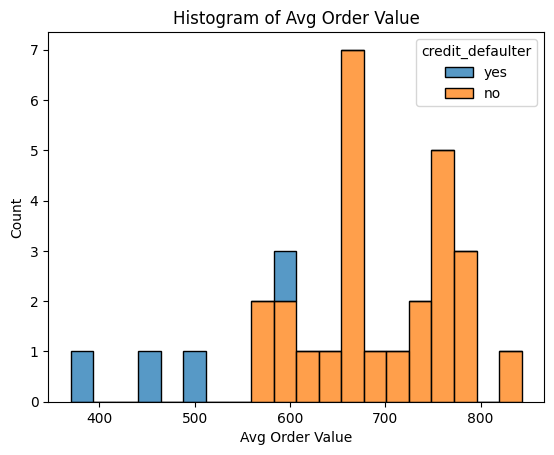

In [84]:
plt.xlabel('Avg Order Value')
plt.ylabel('Count')
plt.title('Histogram of Avg Order Value')
sns.histplot(data = df, x='credit_score',hue='credit_defaulter', multiple='stack', bins=20)  
plt.show()

Mostly the credit defaulters are below 600 and this can be huge factor in deciding whether to give credit card or not. 

In [85]:
df.columns

Index(['location', 'cust_age', 'avg_order_value', 'credit_score',
       'credit_defaulter'],
      dtype='object')

In [86]:
df[['cust_age', 'avg_order_value', 'credit_score']].corr()

,cust_age,avg_order_value,credit_score
cust_age,1.000000,0.137892,0.067784
avg_order_value,0.137892,1.000000,-0.078803
credit_score,0.067784,-0.078803,1.000000


In [87]:
df['credit_defaulter'].value_counts()

credit_defaulter
no     26
yes     4
Name: count, dtype: int64

The data is imbalanced, as we can see the non defaulters are 26 and defaulters are just 4.

### Random Forest

In [88]:
df = pd.get_dummies(df, columns=['location'])
X = df[['location_City','location_Rural', 'cust_age', 'avg_order_value', 'credit_score']]
y = df['credit_defaulter']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
y_test.value_counts()

credit_defaulter
no     4
yes    2
Name: count, dtype: int64

In [109]:
# random forest with parameters n_estimator = 100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
rf_classifier.fit(X_train, y_train)

# predict the class
y_pred = rf_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate f1 score
f1 = f1_score(y_test, y_pred, pos_label='no')
print("F1 Score:", f1)

Accuracy: 0.8181818181818182
F1 Score: 0.6666666666666666


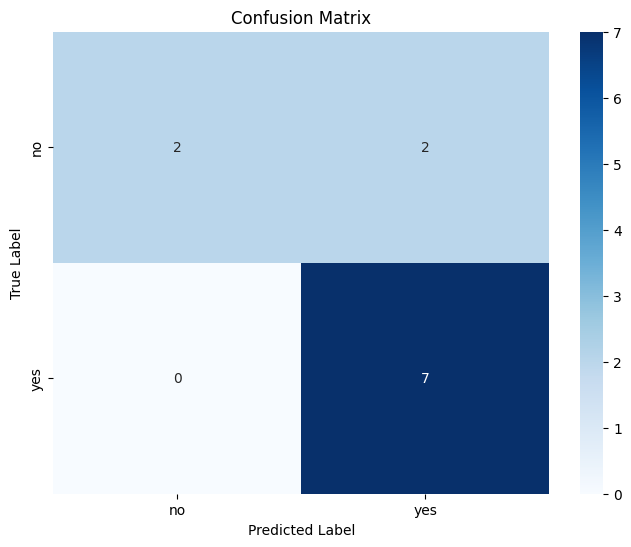

In [110]:


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

#plot the confusion matrix
plt.figure(figsize=(8, 6))
class_labels = ['no','yes']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Over Sampling 

In [93]:
# perform oversampling
oversampler = RandomOverSampler(random_state=34)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [97]:
y_train.value_counts()

credit_defaulter
no     22
yes    19
Name: count, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [95]:
# random forest with parameters n_estimator = 100
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# fit the model
rf_classifier.fit(X_train, y_train)

# predict the class
y_pred = rf_classifier.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# calculate f1 score
f1 = f1_score(y_test, y_pred, pos_label='no')
print("F1 Score:", f1)

Accuracy: 1.0
F1 Score: 1.0


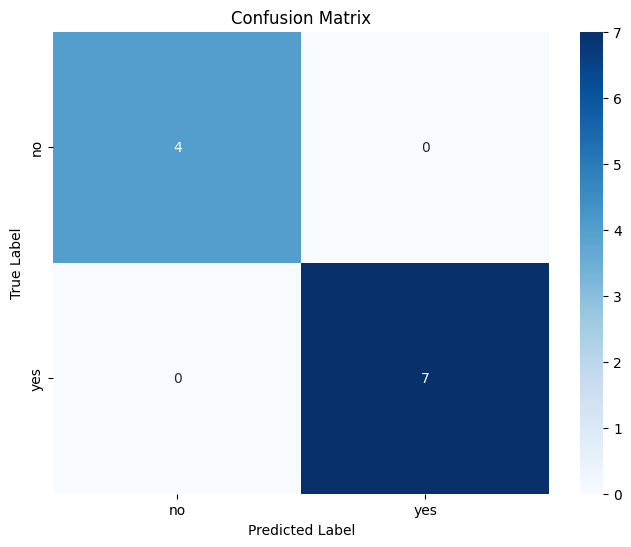

In [96]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
class_labels = ['no','yes']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()